In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
print("Total Rows: {}\nTotal Columns: {}".format(dataset.shape[0],dataset.shape[1]))

Total Rows: 5110
Total Columns: 12


In [4]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning and Processing

In [5]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

###### Since the column 'bmi' has Nan values,we can replace the Nan values by the mean of all the values in the 'bmi' column or we can simply drop the rows with nan values but that might lead to lesser number of training data and hence we shall  use the replace method

In [6]:
bmi = round(dataset['bmi'].mean(),1)#rounding to only 1 decimal place as other values also are rounded to 1 decimal place
dataset['bmi'].fillna(bmi, inplace=True)

In [7]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
dataset['age']

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64

###### Since there are many unique values in the 'age' column,we shall categorize the 'age' column

In [9]:
bins = [0,18,36,54,72,90]
labels = ['0-18','18-36','36-54','54-72','72-90']
dataset['age'] = pd.cut(dataset['age'], bins=bins, labels=labels)

In [10]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,54-72,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,54-72,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,72-90,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,36-54,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,72-90,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Visualisation

In [11]:
import seaborn as sns

Text(0, 0.5, 'Count Of Patients')

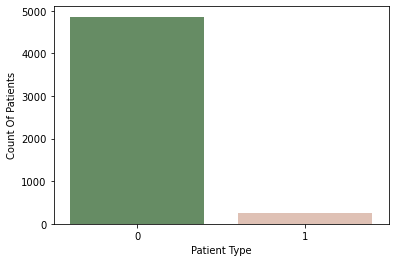

In [12]:
sns.countplot(x = 'stroke',palette = ['#60935D','#E6BEAE'],data = dataset)
plt.xlabel("Patient Type")
plt.ylabel("Count Of Patients")
# 0 represents patients who have never suffered a stroke
# 1 represents patients who have suffered a stroke

###### There are lesser number of patients who have suffered from a stroke as compared to those who have suffered from the stroke

Text(0, 0.5, 'Count Of Patients')

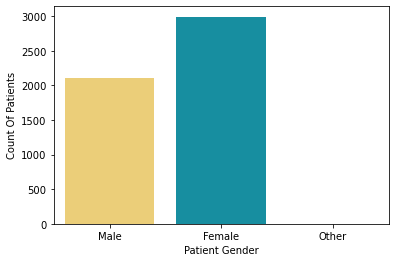

In [13]:
sns.countplot(x = 'gender',palette = ['#FED766','#009FB7','#E6E6EA'],data = dataset)
plt.xlabel("Patient Gender")
plt.ylabel("Count Of Patients")

Text(0, 0.5, 'Count Of Patients')

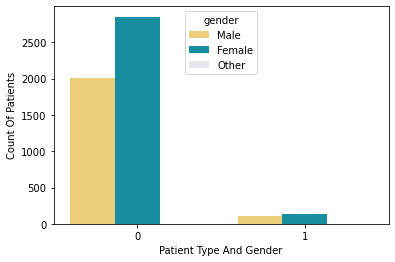

In [14]:
sns.countplot(x = 'stroke',hue = 'gender',palette = ['#FED766','#009FB7','#E6E6EA'],data = dataset)
plt.xlabel("Patient Type And Gender")
plt.ylabel("Count Of Patients")
# 0 represents patients who have never suffered a stroke
# 1 represents patients who have suffered a stroke

###### There are more female patients

Text(0, 0.5, 'Count Of Patients')

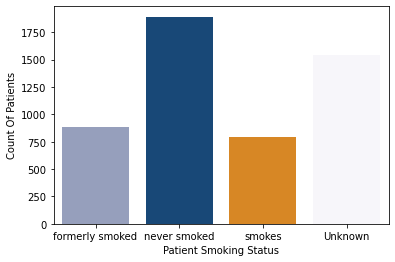

In [15]:
sns.countplot(x = 'smoking_status',palette = ['#909CC2','#084887','#F58A07','#F7F5FB'],data = dataset)
plt.xlabel("Patient Smoking Status")
plt.ylabel("Count Of Patients")

Text(0, 0.5, 'Count Of Patients')

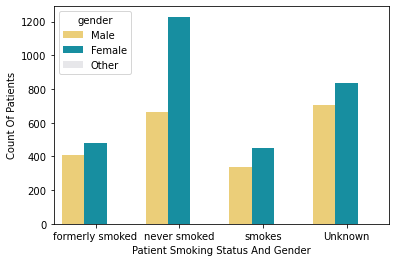

In [16]:
sns.countplot(x = 'smoking_status',hue = 'gender',palette = ['#FED766','#009FB7','#E6E6EA'],data = dataset)
plt.xlabel("Patient Smoking Status And Gender")
plt.ylabel("Count Of Patients")

###### We can see that majority of the patients havent smoked out of which the maximum count is that of females

Text(0, 0.5, 'Count Of Patients')

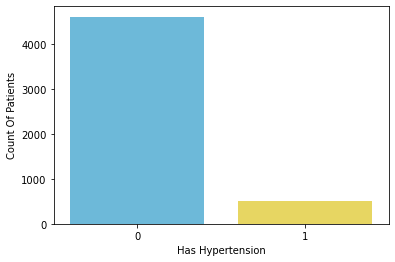

In [17]:
sns.countplot(x = 'hypertension',palette = ['#5BC0EB','#FDE74C'],data = dataset)
plt.xlabel("Has Hypertension")
plt.ylabel("Count Of Patients")
# 0 represents patients who do not have hypertension
# 1 represents patients who have hypertension

Text(0, 0.5, 'Count Of Patients')

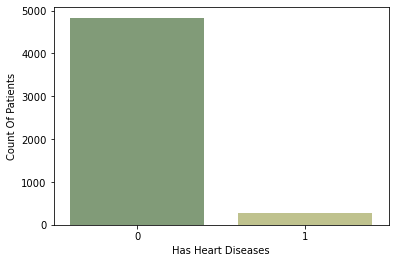

In [18]:
sns.countplot(x = 'heart_disease',palette = ['#7EA172','#C7CB85'],data = dataset)
plt.xlabel("Has Heart Diseases")
plt.ylabel("Count Of Patients")
# 0 represents patients who do not have heart diseases
# 1 represents patients who have heart diseases

Text(0, 0.5, 'Count Of Patients')

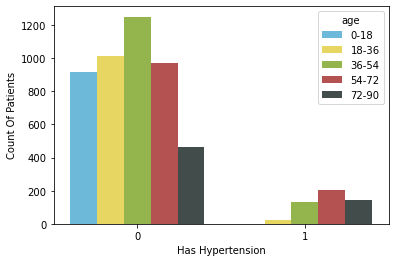

In [19]:
sns.countplot(x = 'hypertension',hue="age",palette = ['#5BC0EB','#FDE74C','#9BC53D','#C3423F','#404E4D'],data = dataset)
plt.xlabel("Has Hypertension")
plt.ylabel("Count Of Patients")
# 0 represents patients who do not have hypertension
# 1 represents patients who have hypertension

Text(0, 0.5, 'Count Of Patients')

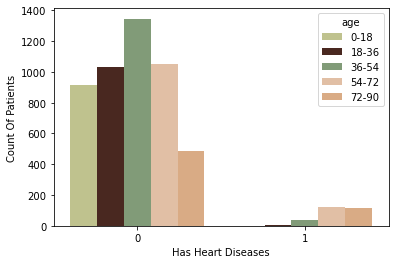

In [20]:
sns.countplot(x = 'heart_disease',hue="age",palette = ['#C7CB85','#502419','#7EA172','#EBBE9B','#E7A977'],data = dataset)
plt.xlabel("Has Heart Diseases")
plt.ylabel("Count Of Patients")
# 0 represents patients who do not have heart diseases
# 1 represents patients who have heart diseases

###### We observe that patients between the age of 0-18 do not suffer from hypertension or any underlying heart conditions whereas patients above 18 years of age may be suffering from either hypertension, heart conditions, or both.

Text(0, 0.5, 'Count Of Patients')

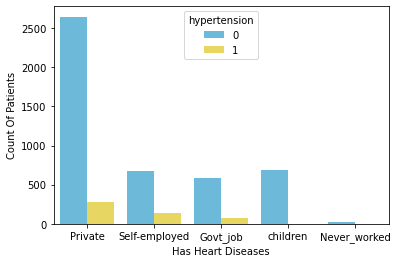

In [21]:
sns.countplot(x = 'work_type',hue="hypertension",palette = ['#5BC0EB','#FDE74C'],data = dataset)
plt.xlabel("Has Heart Diseases")
plt.ylabel("Count Of Patients")
# 0 represents patients who do not have hypertension
# 1 represents patients who have hypertension

Text(0, 0.5, 'Count Of Patients')

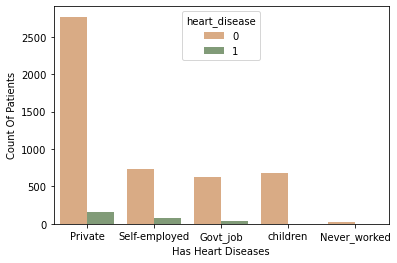

In [22]:
sns.countplot(x = 'work_type',hue="heart_disease",palette = ['#E7A977','#7EA172'],data = dataset)
plt.xlabel("Has Heart Diseases")
plt.ylabel("Count Of Patients")
# 0 represents patients who do not have heart diseases
# 1 represents patients who have heart diseases

###### Children and patients who have never worked are likely not to suffer from hypertension or heart diseases

In [23]:
dataset.describe()

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.097456,0.054012,106.147677,28.893503,0.048728
std,21161.721625,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,1.000000,1.000000,271.740000,97.600000,1.000000


###### We know that the bmi generally lies between 10.3 to 43.0 and hence there are some outliers present in the 'bmi' column

In [24]:
dataset = dataset[(dataset['bmi'] > 10.3) & (dataset['bmi'] < 43)] 

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
column = ['gender', 'age', 'hypertension', 'ever_married','work_type', 'Residence_type', 'smoking_status']
for i in column:
    dataset[i] = encoder.fit_transform(dataset[i])
del dataset['id']

###### As we have seen that our dataset is highly imbalanced and hence we need to resample it

In [26]:
from sklearn.utils import resample

majority = dataset[dataset['stroke'] == 0]
minority = dataset[dataset['stroke'] == 1]
upsampled = resample(minority, replace=True, n_samples=len(majority))

In [27]:
final_dataset = pd.concat([majority,upsampled])
final_dataset = final_dataset.sample(frac=1).reset_index(drop=True)
final_dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,0,0,1,2,1,98.05,24.7,2,0
1,1,4,0,0,1,3,1,99.33,33.7,2,1
2,1,0,0,0,0,4,1,109.52,13.9,0,0
3,1,2,0,0,1,2,0,107.06,28.9,3,0
4,0,3,0,0,1,2,1,107.26,38.6,1,1


### Correlation of each feature in the dataset

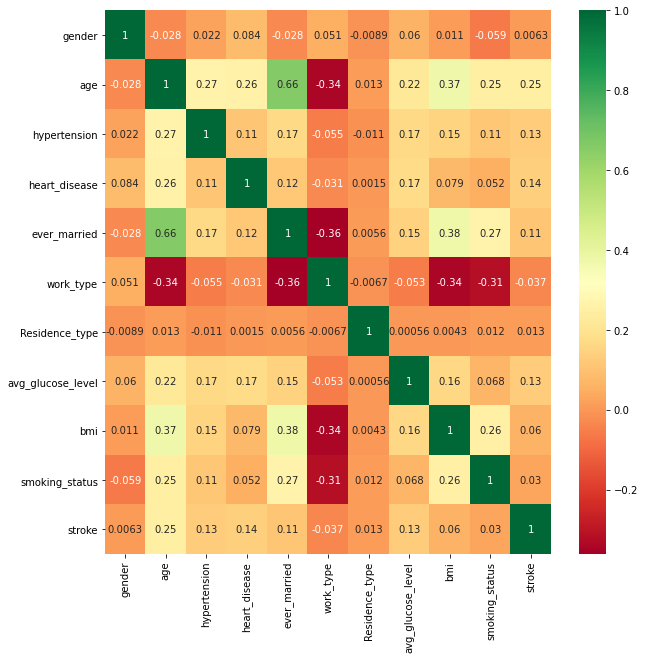

In [28]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Building the Model

In [29]:
X = final_dataset.iloc[:, :-1].values
y = final_dataset.iloc[:, -1].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1166   21]
 [   0 1125]]


0.990916955017301

###### After trying various classification models,I concluded that the Random Forest Classifier gives the best accuracy